In [27]:
import argparse
import easydict

from utils.config import *
from utils.count_model import *
from agents import *
from torchsummaryX import summary


In [28]:
config = easydict.EasyDict()
config.exp_name = "vgg16_exp_cifar100_0"
config.log_dir = os.path.join("experiments", config.exp_name, "logs/")

config.load_file = os.path.join("experiments", "vgg16_exp_cifar100_0","checkpoints", "checkpoint.pth")
config.cuda = True
config.gpu_device = 0
config.seed = 1
config.milestones = [5, 10,15]
config.gamma = 0.9
config.img_size = 32
config.num_classes = 100
config.data_mode = "download"
config.data_loader_workers = 4
config.pin_memory = True
config.async_loading = True
config.batch_size = 128
config.async_loading = True
config.max_epoch = 100
#torch.cuda.init()

#agent = globals()["VGG_BN_cifar"](config)
agent = VGG_BN_cifar(config)
agent.init_graph()
agent.load_checkpoint(config.load_file)
agent.compress(method = 'greedy',k=0.62)
summary(agent.model, torch.zeros((1, 3, 32, 32)).to(torch.device("cuda")))
best,history = agent.train(specializing=False, freeze_conv=False)


print(count_model_param_nums(agent.model) / 1e6)
print(count_model_flops(agent.model, input_res=32)/ 1e9)


Files already downloaded and verified
num_pruned 25
indices_pruned !!!  [59, 42, 24, 13, 7, 25, 47, 60, 61, 16, 28, 48, 32, 1, 56, 8, 33, 46, 20, 10, 44, 36, 53, 14, 9]


AssertionError: Torch not compiled with CUDA enabled

In [24]:
globals()["VGG_cifar"]

<module 'agents.VGG_cifar' from '/Users/bumuxiyu/Desktop/Tokyo institute of technology/code/ThiNet/Channel-Pruning-using-Thinet-LASSO-/agents/VGG_cifar.py'>

In [4]:
best

0.7082

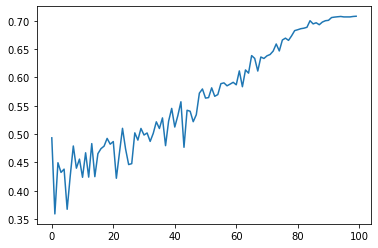

In [5]:
import matplotlib.pyplot as plt
plt.plot(history)